In [16]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

PI = np.pi

In [27]:
import sys
sys.path.append("../tools/")
from misc_utils import read_partial_map

In [5]:
Z_CUTS = [(0.1, 0.3),
          (0.3, 0.5),
          (0.5, 0.7),
          (0.7, 0.9),
          (0.9, 1.2),
         ]

BIN_OPERATOR = np.loadtxt("../data/xcorr/bin_operator_log_n_bin_13_ell_51-2952.txt")

In [24]:
def load_polspice_Cl(path, map_name):
    Cl = {}
    B = BIN_OPERATOR
    n_ell = B.shape[1]

    for z_cut in Z_CUTS:
        ell, TE, TB = np.loadtxt(os.path.join(path, f"z{z_cut[0]:.1f}-{z_cut[1]:.1f}-{map_name}/spice.cl"), 
                                 unpack=True, usecols=[0,7,8])

        Cl[z_cut] = {"ell"   : B @ ell[:n_ell],
                     "Cl_TE" : B @ TE[:n_ell],
                     "Cl_TB" : B @ TB[:n_ell]}

    return Cl

def load_pymaster_Cl(path):
    Cl = {}
    B = BIN_OPERATOR
    n_ell = B.shape[1]

    coupled = np.loadtxt(os.path.join(path, "Cl_coupled.txt"))
    decoupled = np.loadtxt(os.path.join(path, "Cl_decoupled.txt"))

    for i, z_cut in enumerate(Z_CUTS):
        Cl[z_cut] = {"ell_coupled"  : B @ coupled[:n_ell, 0],
                     "ell"          : decoupled[:, 0],
                     "Cl_TE_coupled": B @ coupled[:n_ell, 2*i+1],
                     "Cl_TB_coupled": B @ coupled[:n_ell, 2*i+2],
                     "Cl_TE"        : decoupled[:, 2*i+1],
                     "Cl_TB"        : decoupled[:, 2*i+2],}

    return Cl

Cl_y_shear_polspice = {#"ACT_BN_thetamax120" : load_polspice_Cl("../results/measurements/shear_KiDS1000_y_ACT_BN_thetamax120/", "ACT_BN"),
                       "ACT_BN_thetamax60" : load_polspice_Cl("../results/measurements/shear_KiDS1000_y_ACT_BN_thetamax60/", "ACT_BN"),
                       "milca" : load_polspice_Cl("../../project-triad-obsolete/results/measurements/shear_KiDS1000_y/", "milca"),
                      }
Cl_y_shear_pymaster = {"ACT_BN" : load_pymaster_Cl("../results/measurements/shear_KiDS1000_y_ACT_BN_namaster/"),
                       "ACT_BN_deproject_cib" : load_pymaster_Cl("../results/measurements/shear_KiDS1000_y_ACT_BN_deproject_cib_namaster/"),
                       "milca" : load_pymaster_Cl("../results/measurements/shear_KiDS1000_y_milca_namaster/")}

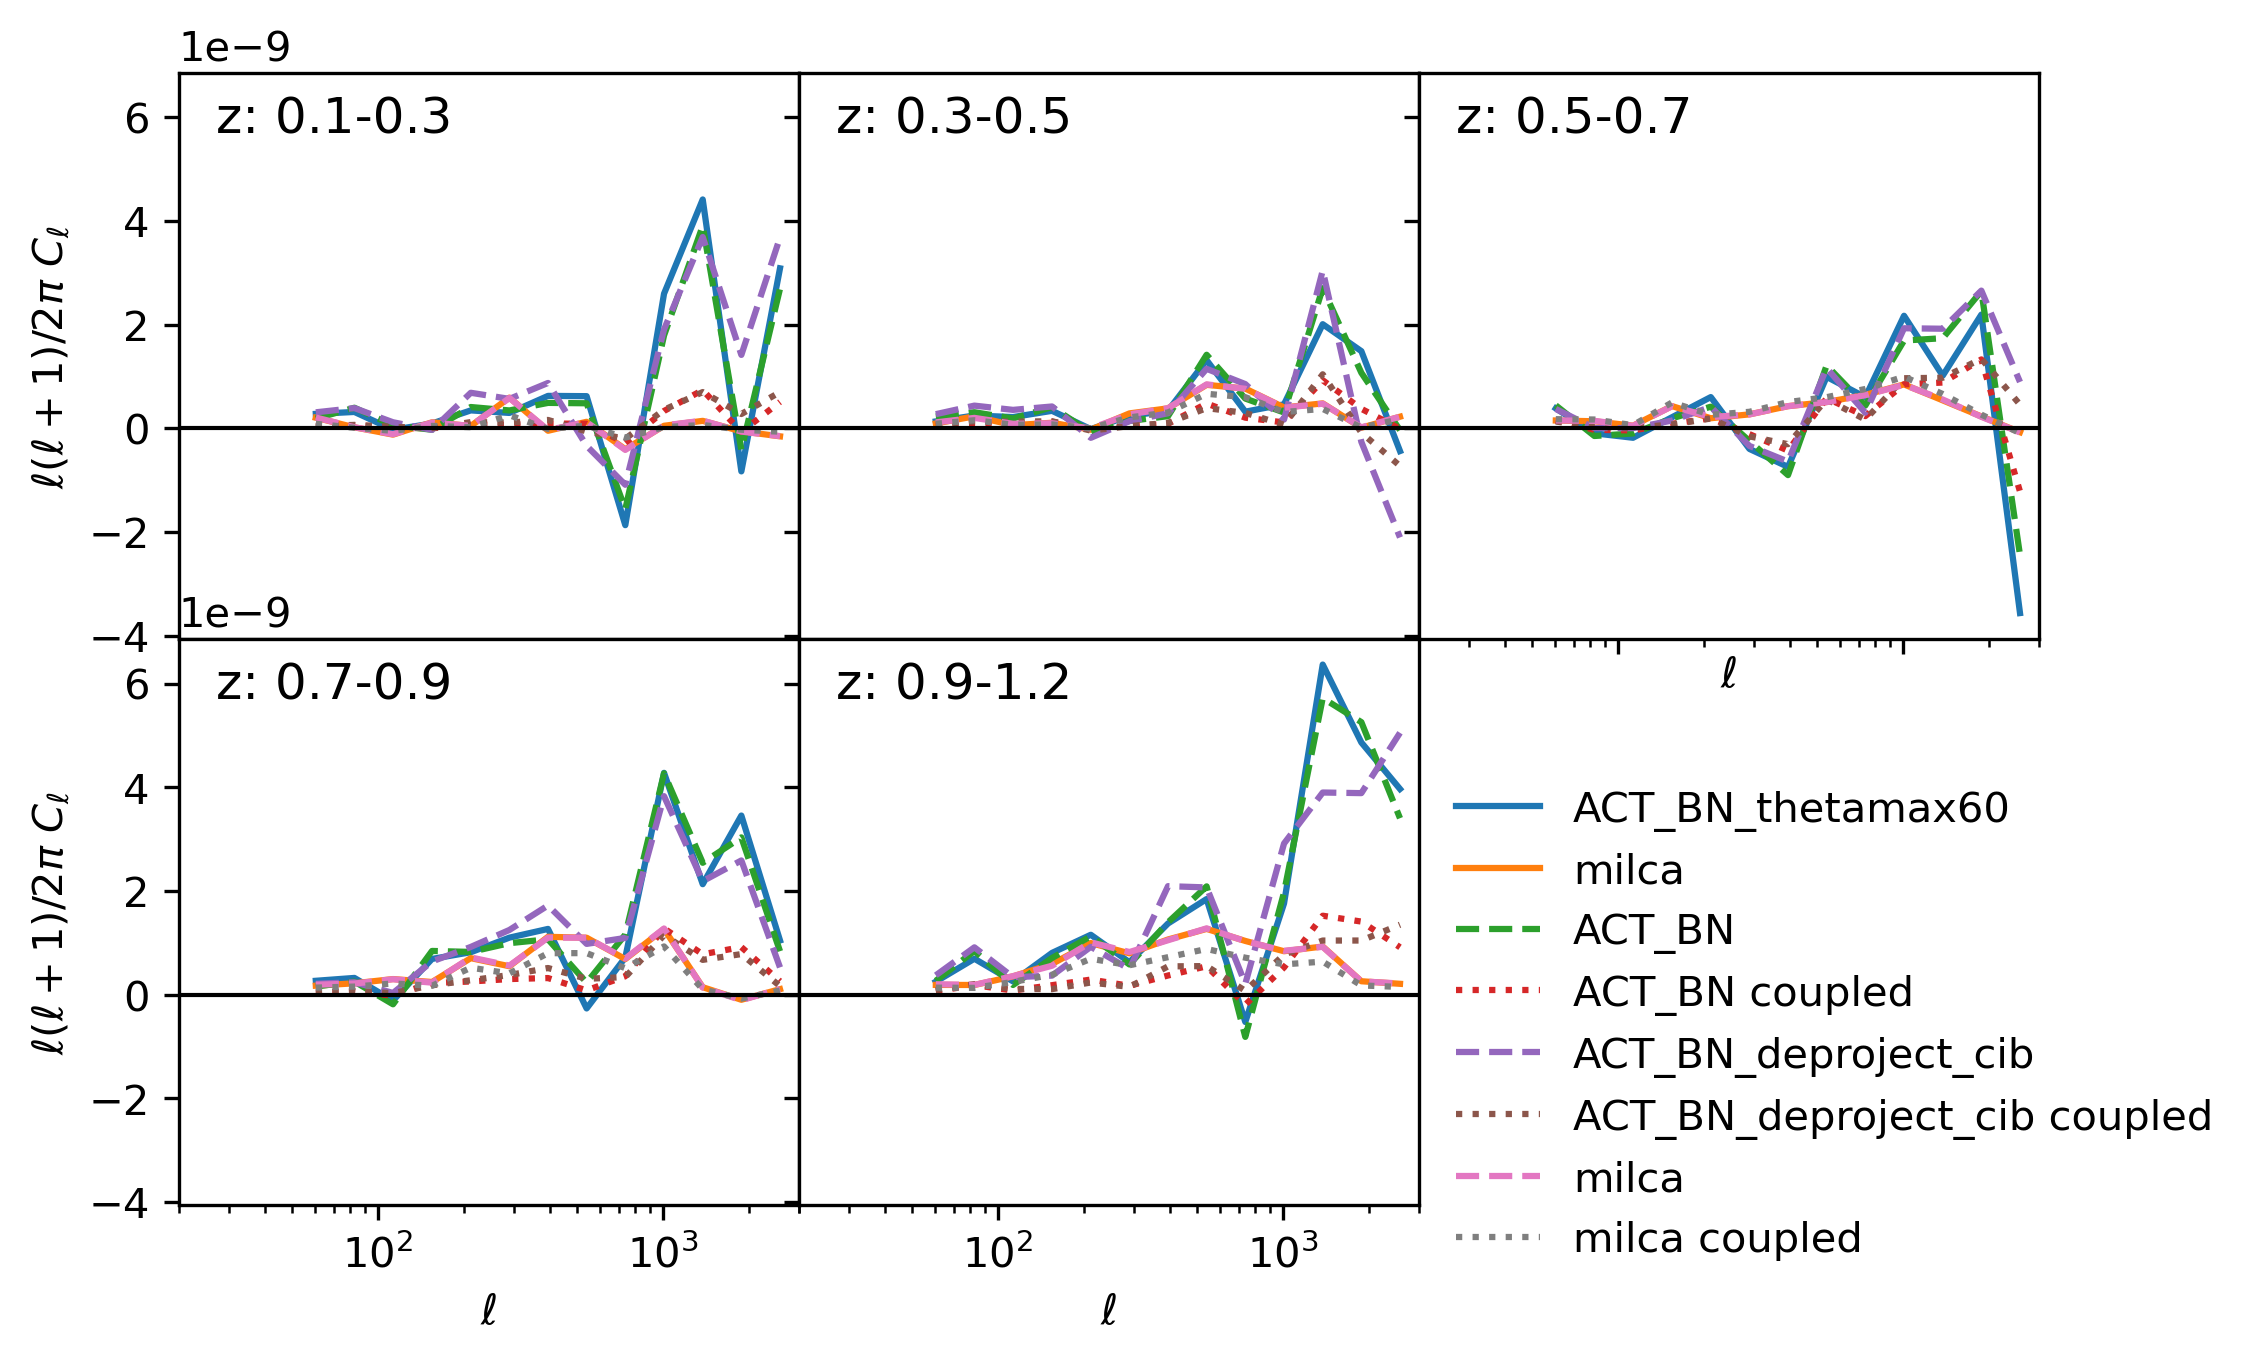

In [25]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8, 5))
fig.subplots_adjust(hspace=0, wspace=0)

for i, z_cut in enumerate(Z_CUTS):

    for map_name, Cl_dict in Cl_y_shear_polspice.items():
        ell, Cl = Cl_dict[z_cut]["ell"], Cl_dict[z_cut]["Cl_TE"]
        u = ell**2/(2*PI)
        ax.flatten()[i].plot(ell, u*Cl, ls="-", label=map_name)

    for map_name, Cl_dict in Cl_y_shear_pymaster.items():
        ell, Cl = Cl_dict[z_cut]["ell"], Cl_dict[z_cut]["Cl_TE"]
        u = ell**2/(2*PI)
        ax.flatten()[i].plot(ell, u*Cl, ls="--", label=map_name)

        ell, Cl = Cl_dict[z_cut]["ell_coupled"], Cl_dict[z_cut]["Cl_TE_coupled"]
        u = ell**2/(2*PI)
        ax.flatten()[i].plot(ell, u*Cl, ls=":", label=map_name + " coupled")

    ax.flatten()[i].axhline(0, c="k", lw=1)
    ax.flatten()[i].set_xlabel(r"$\ell$")
    ax.flatten()[i].set_title(f"z: {z_cut[0]}-{z_cut[1]}", x=0.25, y=0.85)
    
[p[0].set_ylabel(r"$\ell(\ell+1)/2\pi\ C_\ell$") for p in ax]

ax.flatten()[-2].legend(frameon=False, loc="upper left", bbox_to_anchor=(1,0.8))

ax.flatten()[-1].axis("off")
ax[0,0].set_xscale("log")
# ax[0,0].set_yscale("log")

ax[0,0].set_xlim(20, 3000)
# ax[0,0].set_ylim(1e-11, 1e-8)

fig.dpi = 300
# fig.savefig("plots/KiDS1000xtSZ_fid_w_IA.png")

## Coupled Cls from healpy vs pymaster

In [26]:
import healpy

In [71]:
e1, e2 = read_partial_map("../data/shear_maps_KiDS1000_cel_N/z0.9-1.2/triplet.fits",
                                      fields=[2, 3], fill_value=0,
                                      scale=[1, 1])
w = healpy.read_map("../data/shear_maps_KiDS1000_cel_N/z0.9-1.2/doublet_weight.fits")
w[w == healpy.UNSEEN] = 0

f = healpy.read_map("../data/y_maps/ACT/BN.fits")
f[f == healpy.UNSEEN] = 0


/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/ttroester/Codes/miniconda/envs/kcap_env_re/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = EXPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [72]:
Cl_anafast = healpy.anafast([f, np.zeros_like(f), np.zeros_like(f)], [np.zeros_like(f), w*e1, w*e2], pol=True, iter=1, lmax=3000)

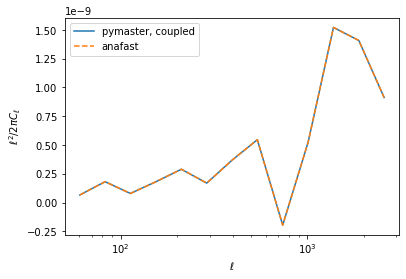

In [76]:
ell, Cl = Cl_y_shear_pymaster["ACT_BN"][(0.9,1.2)]["ell_coupled"], Cl_y_shear_pymaster["ACT_BN"][(0.9,1.2)]["Cl_TE_coupled"]

u = ell**2/(2*PI)

plt.plot(ell, u*Cl, label="pymaster, coupled")
plt.plot(ell, u* (BIN_OPERATOR @ Cl_anafast[3,:3001]), ls="--", label="anafast")

plt.xscale("log")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell^2/2\pi C_\ell$")
plt.legend()
